In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [3]:
#데이터 불러오기
df = pd.read_csv("online_retail_II.csv")

# 1.1 EDA

In [4]:
df.shape

(1067371, 8)

In [5]:
#랜덤 값 확인
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [6]:
df.tail(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


In [7]:
# 기본적인 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


- Invoice : 송장번호
- StockCode : 제품 코드
- Description : 제품 이름
- Quantity : 거래당 각 제품의 수량
- InvoiceDate : 송장날짜 및 시간, 각 거래가 생성된 날짜 및 시간
- Price : 가격(단가)
- CustomerID : 고객번호
- Country : 국가 이름

In [8]:
# 기술통계
df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [9]:
# 결측치
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

<Axes: >

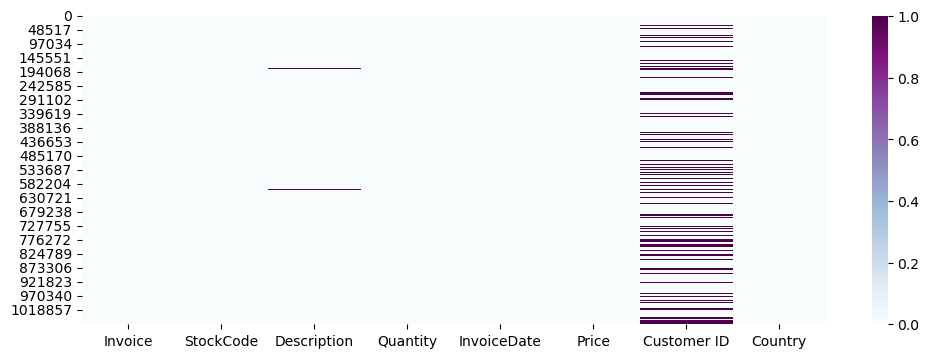

In [10]:
# 결측치 시각화
plt.figure(figsize = (12, 4))
sns.heatmap(data = df.isnull(), cmap = "BuPu")

제품명이나 구매자 아이디를 제외하고는 결측치가 없음
둘 사이의 상관관계도 거의 없음
구매자 아이디에 결측치가 발생한 것은 단순 비회원 구매일것.

In [11]:
df[df['Customer ID'].isnull()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1066997,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
1066998,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
1066999,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
1067000,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


Customer ID는 값을 채우거나 했을때 유의미한 정도가 없는 결측치로 판단된다.(Country 값 말고 다른 Column과의 상관관계를 찾기가 어려움)

In [12]:
# 속성 간 관계 분석
df.corr(numeric_only = "True")

,Quantity,Price,Customer ID
Quantity,1.000000,-0.001319,-0.005430
Price,-0.001319,1.000000,-0.003835
Customer ID,-0.005430,-0.003835,1.000000


<Axes: >

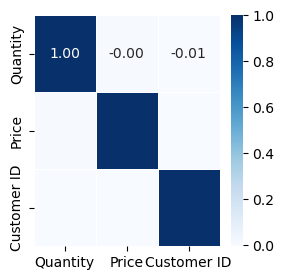

In [13]:
plt. figure(figsize=(3,3))
sns. heatmap (data = df.corr(numeric_only = "True"), annot=True, fmt = '.2f', linewidths=0.5, cmap='Blues')

숫자로 구성된 변수 내에서는 유의미한 상관관계를 보기가 어렵다.

In [14]:
# 새로운 변수 생성
# TotalPrice는 총 매출

df["TotalPrice"] = df['Quantity'] * df['Price']
df.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0


In [15]:
# 매출 상위 10개 국가
df.groupby("Country")["TotalPrice"].agg(["mean", "sum"]).nlargest(10, "sum").style.format("{:,.0f}")

,mean,sum
Country,,
United Kingdom,17,"16,382,584"
EIRE,34,"615,520"
Netherlands,107,"548,525"
Germany,24,"417,989"
France,23,"328,192"
Australia,87,"167,129"
Switzerland,31,"99,729"
Spain,24,"91,859"
Sweden,64,"87,809"


In [16]:
# 판매 빈도 상위 10개 제품
stock_sale = df.groupby(["StockCode"]).agg({"Invoice": "count", "Quantity": "sum","TotalPrice": "sum"}).nlargest(10, "Invoice")
stock_sale

,Invoice,Quantity,TotalPrice
StockCode,,,
85123A,5829,96066,253720.02
22423,4424,25764,327813.65
85099B,4216,95739,181278.51
21212,3318,95450,52447.54
20725,3259,40011,70909.10
84879,2960,80705,131413.85
47566,2768,27291,147948.50
21232,2747,38033,49655.25
22197,2549,79363,80300.07


In [17]:
# stock code 활용해서 새로운 데이터 프레임 작성

stock_desc = df.loc[df["StockCode"].isin(stock_sale.index), ["StockCode", "Description"]]
stock_desc = stock_desc.drop_duplicates("StockCode").set_index("StockCode")
stock_sale["Desc"] = stock_desc
stock_sale

,Invoice,Quantity,TotalPrice,Desc
StockCode,,,,
85123A,5829,96066,253720.02,WHITE HANGING HEART T-LIGHT HOLDER
22423,4424,25764,327813.65,REGENCY CAKESTAND 3 TIER
85099B,4216,95739,181278.51,JUMBO BAG RED WHITE SPOTTY
21212,3318,95450,52447.54,PACK OF 72 RETRO SPOT CAKE CASES
20725,3259,40011,70909.10,LUNCH BAG RED SPOTTY
84879,2960,80705,131413.85,ASSORTED COLOUR BIRD ORNAMENT
47566,2768,27291,147948.50,PARTY BUNTING
21232,2747,38033,49655.25,STRAWBERRY CERAMIC TRINKET BOX
22197,2549,79363,80300.07,"POPCORN HOLDER , SMALL"


In [18]:
import datetime as dt

# InvoiceDate 열을 datetime 객체로 변환하고 각 행에 대해 년도, 월, 일, 요일, 시간을 추출하여 새로운 열에 추가
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["InvoiceYear"] = df["InvoiceDate"].dt.year
df["InvoiceMonth"] = df["InvoiceDate"].dt.month
df["InvoiceDay"] = df["InvoiceDate"].dt.day
df["InvoiceWeekDay"] = df["InvoiceDate"].dt.strftime("%A")  # 요일
df["InvoiceHour"] = df["InvoiceDate"].dt.hour
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceWeekDay,InvoiceHour
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,2009,12,1,Tuesday,7
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009,12,1,Tuesday,7
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009,12,1,Tuesday,7
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,2009,12,1,Tuesday,7
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,2009,12,1,Tuesday,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011,12,9,Friday,12
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,9,Friday,12
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,9,Friday,12
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,2011,12,9,Friday,12


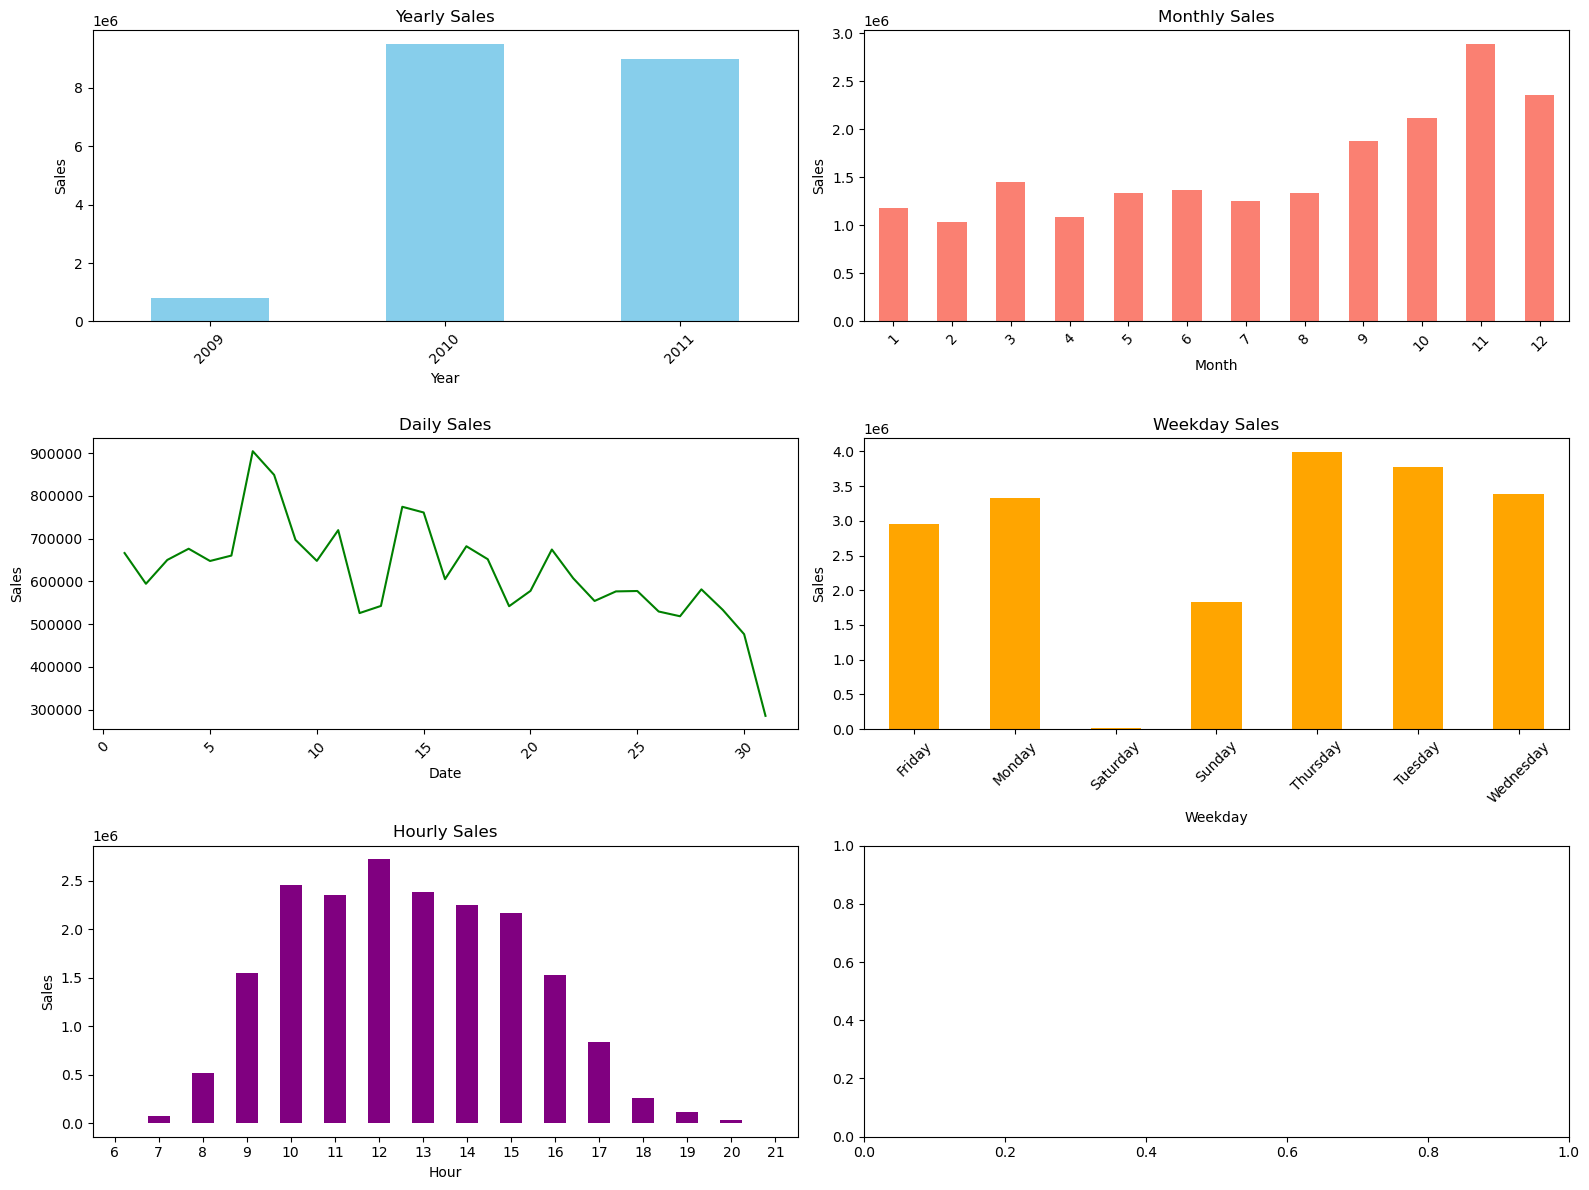

In [19]:
import matplotlib.pyplot as plt

# 연도별 매출
yearly_sales = df.groupby("InvoiceYear")["TotalPrice"].sum()

# 월별 매출
monthly_sales = df.groupby("InvoiceMonth")["TotalPrice"].sum()

# 일별 매출
daily_sales = df.groupby("InvoiceDay")["TotalPrice"].sum()

# 요일별 매출
weekday_sales = df.groupby("InvoiceWeekDay")["TotalPrice"].sum()

# 시간별 매출
hourly_sales = df.groupby("InvoiceHour")["TotalPrice"].sum()


# 그래프 크기 설정
fig, axes = plt.subplots(3, 2, figsize=(16, 12))

# 연도별 매출 그래프
yearly_sales.plot(kind='bar', color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Yearly Sales')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Sales')
axes[0, 0].tick_params(axis='x', rotation=45)

# 월별 매출 그래프
monthly_sales.plot(kind='bar', color='salmon', ax=axes[0, 1])
axes[0, 1].set_title('Monthly Sales')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Sales')
axes[0, 1].tick_params(axis='x', rotation=45)

# 일별 매출 그래프
daily_sales.plot(kind='line', color='green', ax=axes[1, 0])
axes[1, 0].set_title('Daily Sales')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Sales')
axes[1, 0].tick_params(axis='x', rotation=45)

# 요일별 매출 그래프
weekday_sales.plot(kind='bar', color='orange', ax=axes[1, 1])
axes[1, 1].set_title('Weekday Sales')
axes[1, 1].set_xlabel('Weekday')
axes[1, 1].set_ylabel('Sales')
axes[1, 1].tick_params(axis='x', rotation=45)

# 시간별 매출 그래프
hourly_sales.plot(kind='bar', color='purple', ax=axes[2, 0])
axes[2, 0].set_title('Hourly Sales')
axes[2, 0].set_xlabel('Hour')
axes[2, 0].set_ylabel('Sales')
axes[2, 0].tick_params(axis='x', rotation=0)

# subplot간의 간격 조절
plt.tight_layout()

# 그래프 표시
plt.show()

2010년에 가장 많은 구매빈도를 가지고 있으며, 월별로 따졌을 때에는 11월의 구매 빈도가 가장 많았다. 또한 요일별로 따졌을 때에는 목~월까지가 제일 많은 비율을 차지했으며 토요일에는 유의미한 매출이 없었다. 그리고 시간별로 따졌을 때에는 낮시간 구매가 가장 많았다.

전반적인 특이 사항
- null 값의 유의미한 의존도가 떨어지므로 전처리 시 삭제하는 편이 좋을 듯.
- 비회원(customer ID에서 결측치가 발생한 부분)은 frequency 확인이 어려울 듯 싶어 제외해도 좋을 것 같다는 판단이 들음.
- 영국의 점유율이 가장 높으므로 영국을 위주로 하여 살펴봐도 괜찮을 듯 하나 국제적인 사이트의 매출인 만큼 전체를 살펴봐도 좋을 것 같다는 생각이 들었음.

# 1.2 RFM Feature 제작하고 전처리

R : 얼마나 최근에

F : 얼마나 자주

M : 어느 정도의 금액을

In [20]:
retail_sp=df[0:10000]

In [21]:
# 취소반품 고객 제외 
retail_sp=retail_sp[retail_sp['Price']>0]
# 주문 취소하여 주문 수량도 - 인 경우 제외 
retail_sp=retail_sp[retail_sp['Quantity']>0]
# 회원인 고객만 분석 가정 
retail_sp=retail_sp[retail_sp['Customer ID'].notnull()]

In [22]:
retail_sp

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceWeekDay,InvoiceHour
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009,12,1,Tuesday,7
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12,1,Tuesday,7
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12,1,Tuesday,7
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009,12,1,Tuesday,7
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009,12,1,Tuesday,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9671,490147,20982,12 PENCILS TALL TUBE SKULLS,48,2009-12-04 09:31:00,0.85,13408.0,United Kingdom,40.8,2009,12,4,Friday,9
9672,490147,20983,12 PENCILS TALL TUBE RED SPOTTY,48,2009-12-04 09:31:00,0.85,13408.0,United Kingdom,40.8,2009,12,4,Friday,9
9673,490147,84879,ASSORTED COLOUR BIRD ORNAMENT,160,2009-12-04 09:31:00,1.45,13408.0,United Kingdom,232.0,2009,12,4,Friday,9
9674,490147,84988,SET OF 72 PINK HEART PAPER DOILIES,48,2009-12-04 09:31:00,1.45,13408.0,United Kingdom,69.6,2009,12,4,Friday,9


In [23]:
#M feature = Quantity * Price
retail_sp['sales_amount']= retail_sp['Quantity']*retail_sp['Price']

In [95]:
#RFM 지표 제작

# 기준 날짜 설정 (데이터의 마지막 날짜 다음 날)
now = retail_sp['InvoiceDate'].max() + dt.timedelta(days=1)

# Recency, Frequency, Monetary 계산
cust_rfm = retail_sp.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (now - x.max()).days,
    'Invoice': 'count',
    'TotalPrice': 'sum'
}).rename(columns={
    'InvoiceDate': 'Recency',
    'Invoice': 'Frequency',
    'TotalPrice': 'Monetary'
})

In [96]:
cust_rfm

,Recency,Frequency,Monetary
Customer ID,,,
12362.0,3,1,130.00
12435.0,2,1,1008.00
12437.0,2,27,578.28
12490.0,3,21,603.94
12533.0,3,44,929.92
...,...,...,...
18087.0,3,6,394.74
18102.0,1,30,20761.24
18108.0,2,26,493.25


# 1.3 RFM feature를 실제 통계치로 비교
MinMaxScaler 활용

In [97]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

mns = MinMaxScaler()
df_mns = mns.fit_transform(cust_rfm)

# 컬럼 결합
df_mns_sp = pd.DataFrame(data = df_mns, columns = cust_rfm.columns)

# minmax 스케일링 작업 완료
df_mns_sp

,Recency,Frequency,Monetary
0,0.666667,0.000000,0.006161
1,0.333333,0.000000,0.048456
2,0.333333,0.188406,0.027755
3,0.666667,0.144928,0.028992
4,0.666667,0.311594,0.044695
...,...,...,...
278,0.666667,0.036232,0.018914
279,0.000000,0.210145,1.000000
280,0.333333,0.181159,0.023659
281,0.000000,0.152174,0.012309


# 1.4 K-Means Clustering

In [61]:
#고객 군집을 3개로 설정
kmeans_model =KMeans(n_clusters = 3, random_state=111)

kmeans_model.fit(df_mns_sp)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=111)

(1)엘보우 차트를 활용한 군집 평가

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

<Axes: >

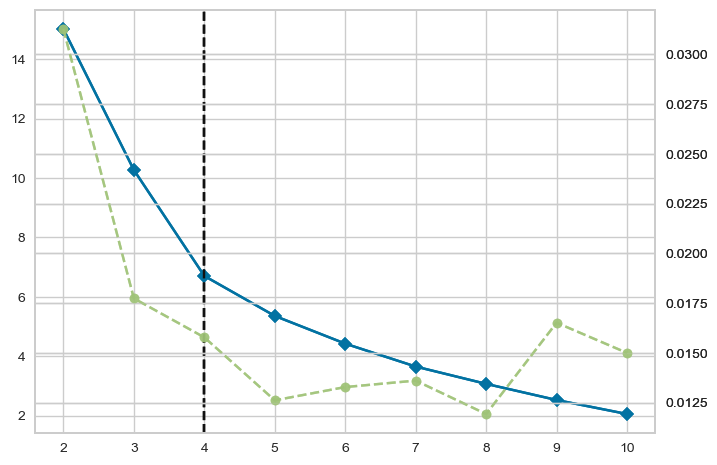

In [62]:
Elbow_ch = KElbowVisualizer(kmeans_model)
Elbow_ch.fit(df_mns_sp) 
Elbow_ch.draw()

n=4 정도에서 군집이 가장 적합함을 알 수 있다.

(2) 실루엣 계수를 활용한 평가

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

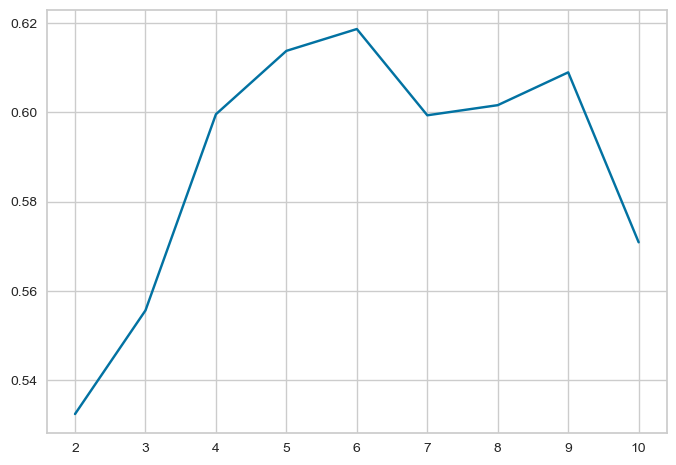

In [63]:
# 반복문을 통해 실루엣 계수가 어떤 식으로 변화하는지 체크하기
KMeans_model={'random_state':111}
sil_coef = []

# 실루엣계수의 그래프 생성

for i in range(2,11):
    kmeans_sil = KMeans(n_clusters = i, **KMeans_model)
    kmeans_sil.fit(df_mns_sp) #데이터 학습
    score = silhouette_score(df_mns_sp, kmeans_sil.labels_)
    sil_coef.append(score)

plt.plot(range(2,11), sil_coef)
plt.xticks(range(2,11))
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

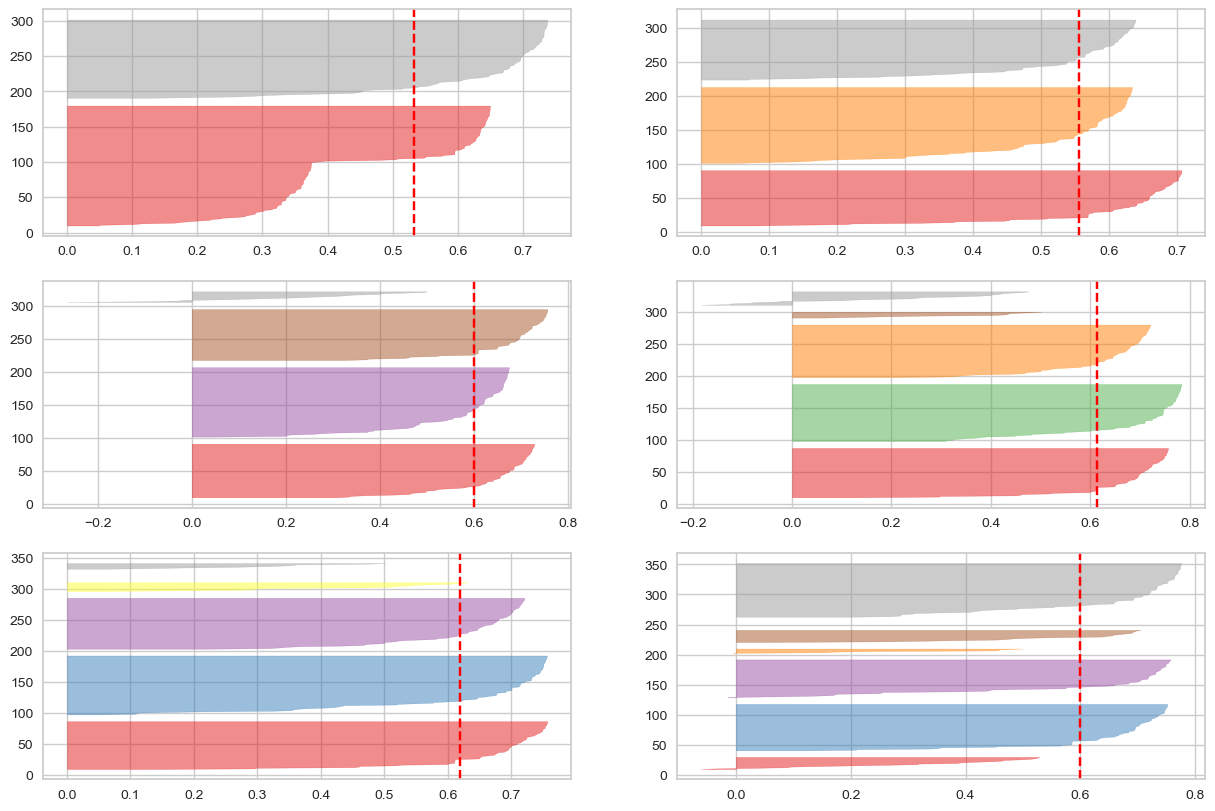

In [64]:
#실루엣 계수 시각화

fig, ax = plt.subplots(3,2 , figsize=(15,10))

for i in [2,3,4,5,6,7]:
    kmeans_model2 = KMeans(
        n_clusters=i,
        random_state=111 )
    q, mod = divmod(i,2)

# 실루엣계수 시각화를 군집별

    visual = SilhouetteVisualizer(kmeans_model2,
                                 color = 'yellowbricks',
                                 ax=ax[q-1][mod])

    visual.fit(df_mns_sp) #데이터셋 학습

실루엣 계수에서는 3도 군집이 나쁘게 갈리지는 않는다.

따라서 군집 개수를 3개로 채택

In [71]:
kmeans_model = KMeans(n_clusters = 3, n_init = "auto")
kmeans_model.fit(df_mns_sp)

KMeans(n_clusters=3, n_init='auto')

# 1.5 군집화된 데이터 Labeling

In [98]:
cust_rfm["Cluster"] = kmeans_model.labels_
cust_rfm

,Recency,Frequency,Monetary,Cluster
Customer ID,,,,
12362.0,3,1,130.00,2
12435.0,2,1,1008.00,0
12437.0,2,27,578.28,0
12490.0,3,21,603.94,2
12533.0,3,44,929.92,2
...,...,...,...,...
18087.0,3,6,394.74,2
18102.0,1,30,20761.24,1
18108.0,2,26,493.25,0


In [99]:
#클러스터의 rfm 평균값
cluster_mean = cust_rfm.groupby("Cluster").agg("mean")
cluster_mean

,Recency,Frequency,Monetary
Cluster,,,
0,2.044944,25.112360,561.834270
1,1.026786,24.776786,760.629107
2,3.036585,24.536585,418.210244


In [100]:
#전처리한 데이터프레임에 클러스터 Column 추가
retail_sp['Cluster'] = retail_sp['Customer ID'].map(cust_rfm['Cluster'])
retail_sp

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceWeekDay,InvoiceHour,sales_amount,Cluster,Date,Hour
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009,12,1,Tuesday,7,83.4,1,2009-12-01,7
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12,1,Tuesday,7,81.0,1,2009-12-01,7
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12,1,Tuesday,7,81.0,1,2009-12-01,7
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009,12,1,Tuesday,7,100.8,1,2009-12-01,7
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009,12,1,Tuesday,7,30.0,1,2009-12-01,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,490147,20982,12 PENCILS TALL TUBE SKULLS,48,2009-12-04 09:31:00,0.85,13408.0,United Kingdom,40.8,2009,12,4,Friday,9,40.8,1,2009-12-04,9
7018,490147,20983,12 PENCILS TALL TUBE RED SPOTTY,48,2009-12-04 09:31:00,0.85,13408.0,United Kingdom,40.8,2009,12,4,Friday,9,40.8,1,2009-12-04,9
7019,490147,84879,ASSORTED COLOUR BIRD ORNAMENT,160,2009-12-04 09:31:00,1.45,13408.0,United Kingdom,232.0,2009,12,4,Friday,9,232.0,1,2009-12-04,9
7020,490147,84988,SET OF 72 PINK HEART PAPER DOILIES,48,2009-12-04 09:31:00,1.45,13408.0,United Kingdom,69.6,2009,12,4,Friday,9,69.6,1,2009-12-04,9


# RFM Feature를 이용하여 붙인 Label로 다른 Feature 분석하기

In [101]:
# 각 군집별 주문 제품 분석
cluster_products = retail_sp.groupby('Cluster')['Description'].apply(lambda x: x.value_counts().head(10))
cluster_products

Cluster                                    
0        WHITE HANGING HEART T-LIGHT HOLDER    16
         PACK OF 72 RETRO SPOT CAKE CASES      16
         PAPER CHAIN KIT 50'S CHRISTMAS        15
         JUMBO BAG RED WHITE SPOTTY            13
         FAIRY CAKE CANDLES                    12
         HOT WATER BOTTLE TEA AND SYMPATHY     11
         REX CASH+CARRY JUMBO SHOPPER          11
         SCOTTIE DOG HOT WATER BOTTLE          10
         BAKING SET 9 PIECE RETROSPOT           9
         RED HANGING HEART T-LIGHT HOLDER       9
1        WHITE HANGING HEART T-LIGHT HOLDER    23
         PAPER CHAIN KIT 50'S CHRISTMAS        19
         RETRO SPOT TEA SET CERAMIC 11 PC      16
         STRAWBERRY CERAMIC TRINKET BOX        15
         WHITE SKULL HOT WATER BOTTLE          14
         ASSORTED COLOUR BIRD ORNAMENT         14
         REX CASH+CARRY JUMBO SHOPPER          13
         HOT WATER BOTTLE TEA AND SYMPATHY     12
         RED WOOLLY HOTTIE WHITE HEART.        12
      

In [102]:
print(retail_sp['InvoiceDate'].dtypes)

datetime64[ns]


In [103]:
#  데이터 기간 확인
print("Date Range:", retail_sp['InvoiceDate'].min(), "to", retail_sp['InvoiceDate'].max())

Date Range: 2009-12-01 07:45:00 to 2009-12-04 09:31:00


In [104]:
#  각 클러스터별 데이터 수 확인
print(retail_sp.groupby('Cluster').size())

Cluster
0    2235
1    2775
2    2012
dtype: int64


In [105]:
# 일자 추출
retail_sp['Date'] = retail_sp['InvoiceDate'].dt.date

In [109]:
daily_sales = retail_sp.groupby(['Cluster', 'Date'])['TotalPrice'].sum().unstack('Cluster')
print(daily_sales)

Cluster            0         1         2
Date                                    
2009-12-01   1052.62   8702.83  34293.24
2009-12-02  48950.63   3991.36       NaN
2009-12-03       NaN  67479.08       NaN
2009-12-04       NaN   5017.19       NaN


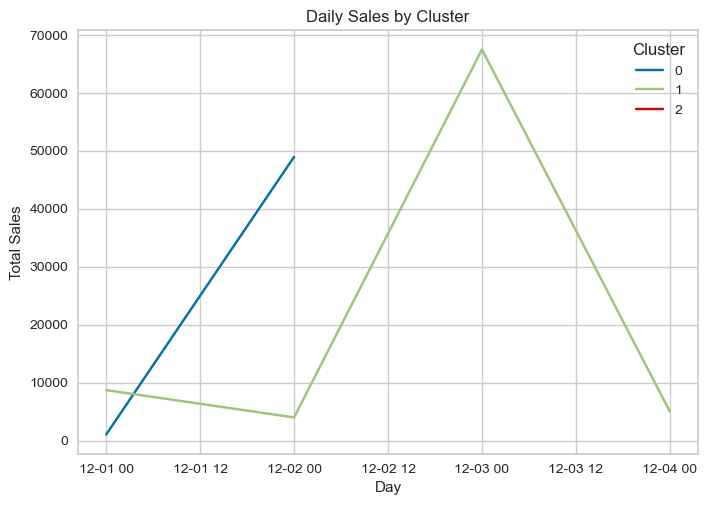

In [107]:
# 클러스터별 일별 매출 합계
daily_sales.plot()
plt.title('Daily Sales by Cluster')
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.legend(title='Cluster')
plt.show()

In [108]:
retail_sp.reset_index(drop=True, inplace=True)
retail_sp

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceWeekDay,InvoiceHour,sales_amount,Cluster,Date,Hour
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009,12,1,Tuesday,7,83.4,1,2009-12-01,7
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12,1,Tuesday,7,81.0,1,2009-12-01,7
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12,1,Tuesday,7,81.0,1,2009-12-01,7
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009,12,1,Tuesday,7,100.8,1,2009-12-01,7
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009,12,1,Tuesday,7,30.0,1,2009-12-01,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,490147,20982,12 PENCILS TALL TUBE SKULLS,48,2009-12-04 09:31:00,0.85,13408.0,United Kingdom,40.8,2009,12,4,Friday,9,40.8,1,2009-12-04,9
7018,490147,20983,12 PENCILS TALL TUBE RED SPOTTY,48,2009-12-04 09:31:00,0.85,13408.0,United Kingdom,40.8,2009,12,4,Friday,9,40.8,1,2009-12-04,9
7019,490147,84879,ASSORTED COLOUR BIRD ORNAMENT,160,2009-12-04 09:31:00,1.45,13408.0,United Kingdom,232.0,2009,12,4,Friday,9,232.0,1,2009-12-04,9
7020,490147,84988,SET OF 72 PINK HEART PAPER DOILIES,48,2009-12-04 09:31:00,1.45,13408.0,United Kingdom,69.6,2009,12,4,Friday,9,69.6,1,2009-12-04,9


Cluster        0         1        2
Hour                               
7            NaN   1360.85      NaN
8        1252.10   3517.37      NaN
9        7626.37   4452.97  2878.99
10       9048.51   4761.62  4564.76
11       4897.34   6467.12  4277.54
12       5613.69  15098.25  5568.01
13       6780.21  24493.39  4643.84
14       2452.65   3852.31  4598.88
15       4078.00  11603.56   906.15
16       7434.08   4512.38  2314.59
17        820.30   1612.83  2734.08
18           NaN   2164.72  1428.28
19           NaN    885.87   378.12
20           NaN    407.22      NaN


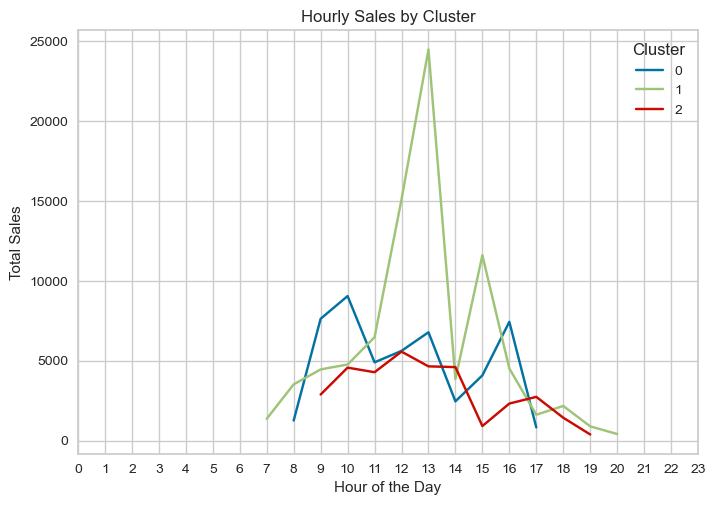

In [110]:
# 시간대 추출
retail_sp['Hour'] = retail_sp['InvoiceDate'].dt.hour

# 클러스터별 시간대별 매출 합계 계산
cluster_time_series = retail_sp.groupby(['Cluster', 'Hour'])['TotalPrice'].sum().unstack('Cluster')

# 그룹핑 확인
print(cluster_time_series)

# 그래프 시각화
cluster_time_series.plot()
plt.title('Hourly Sales by Cluster')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.xticks(range(0, 24))  # 0부터 23까지의 시간대를 표시
plt.legend(title='Cluster')
plt.show()

In [111]:
#각 클러스터별로 가장 많이 구매한 상품
cluster_favorite_category = retail_sp.groupby('Cluster')['Description'].agg(lambda x: x.mode()[0])

# 결과 출력
print(cluster_favorite_category)

Cluster
0      PACK OF 72 RETRO SPOT CAKE CASES
1    WHITE HANGING HEART T-LIGHT HOLDER
2       PAPER CHAIN KIT 50'S CHRISTMAS 
Name: Description, dtype: object


# 1.7 해당 데이터셋의 고객군들의 RFM 지표의 통계치 정리하고, 시각화 통해 군집들의 RFM 지표 정리

In [112]:
cust_rfm

,Recency,Frequency,Monetary,Cluster
Customer ID,,,,
12362.0,3,1,130.00,2
12435.0,2,1,1008.00,0
12437.0,2,27,578.28,0
12490.0,3,21,603.94,2
12533.0,3,44,929.92,2
...,...,...,...,...
18087.0,3,6,394.74,2
18102.0,1,30,20761.24,1
18108.0,2,26,493.25,0


In [115]:
# 전체 RFM 지표
overall_stats = cust_rfm[['Recency', 'Frequency', 'Monetary']].agg(['mean', 'median', 'std', lambda x: x.mode()[0]])

print('Overall RFM Stats:\n', overall_stats)

Overall RFM Stats:
            Recency  Frequency     Monetary
mean      1.929329  24.812721   598.893816
median    2.000000  19.000000   316.220000
std       0.847580  23.689860  1432.629388
<lambda>  1.000000   4.000000     2.100000


In [117]:
# 각 군집별 RFM 지표 계산
cluster_stats = cust_rfm.groupby('Cluster').agg({'Recency': ['mean', 'median', 'std'],
                                             'Frequency': ['mean', 'median', 'std'],
                                             'Monetary': ['mean', 'median', 'std']})

print(cluster_stats)

          Recency                   Frequency                      Monetary  \
             mean median       std       mean median        std        mean   
Cluster                                                                       
0        2.044944    2.0  0.208355  25.112360   18.0  26.072207  561.834270   
1        1.026786    1.0  0.162182  24.776786   18.5  22.546333  760.629107   
2        3.036585    3.0  0.188897  24.536585   20.0  22.771650  418.210244   

                               
          median          std  
Cluster                        
0        306.950   928.908905  
1        320.805  2093.969078  
2        309.595   358.671885  


IndexError: index 3 is out of bounds for axis 0 with size 3

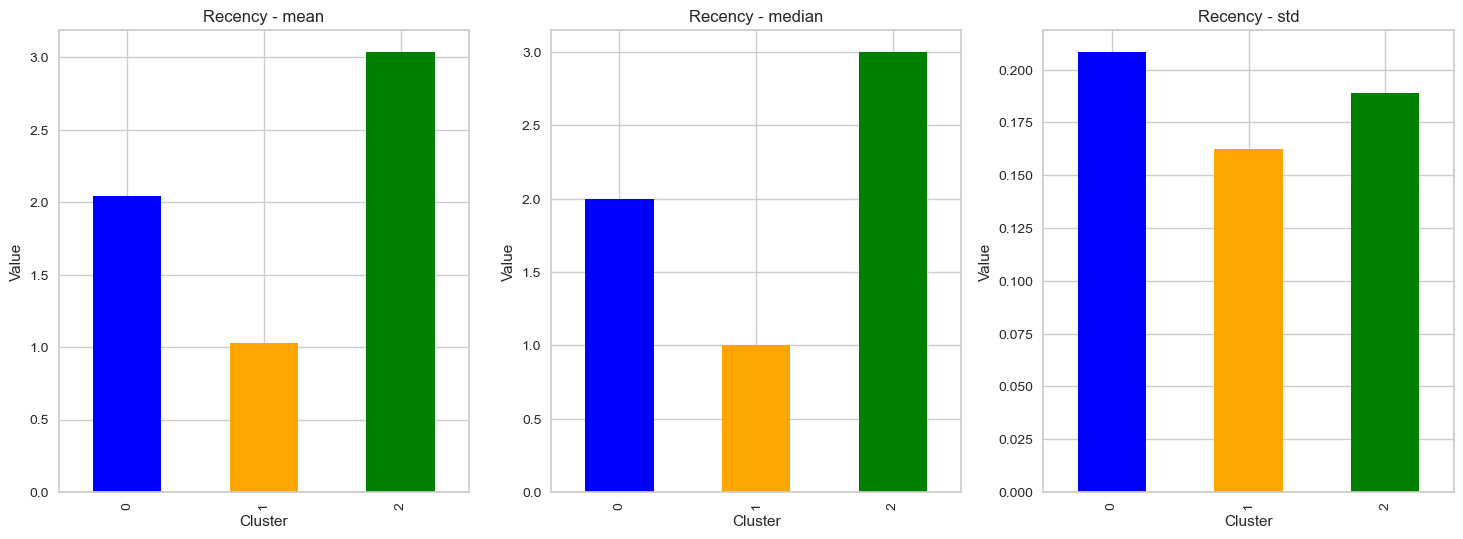

In [118]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for i, (col, stat) in enumerate(cluster_stats.columns):
    ax = axes[i]
    cluster_stats[col][stat].plot(kind='bar', ax=ax, color=['blue', 'orange', 'green'])
    ax.set_title(f'{col} - {stat}')
    ax.set_ylabel('Value')

plt.tight_layout()
plt.show()